In [1]:
import pandas as pd
import numpy as np
#libraries for normality tests
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

In [4]:
#import the User Datasets
xls1 = pd.ExcelFile('New_Users_Revenue.xlsx')
xls2 = pd.ExcelFile('Returning_Users_Revenue.xlsx')
New = pd.read_excel(xls1, 'Dataset1')
Returning = pd.read_excel(xls2, 'Dataset1')

In [5]:
#Remove the dates for ease
New = New['Revenue']
Returning = Returning['Revenue']

In [6]:
#convert datasets into arrays
New = New.values
Returning = Returning.values

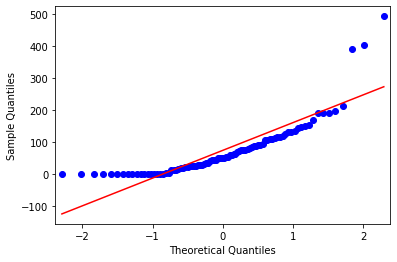

In [7]:
#plot both datasets using qqplot to check for normality
qqplot(New, line='s')

pyplot.show()

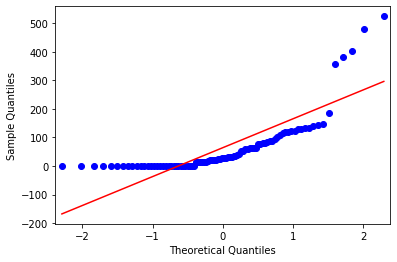

In [8]:
qqplot(Returning, line='s')

pyplot.show()

### Both datasets look normal since they fall on the qq plot

In [9]:
# normality test with Shapiro
stat, p = shapiro(New)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.751, p=0.000
Sample does not look Gaussian (reject H0)


In [10]:
stat, p = shapiro(Returning)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.636, p=0.000
Sample does not look Gaussian (reject H0)


### Since not both datasets are normaly distributed non - parametric tests should be used.

In [11]:
#import ranksums (Wilcoxon-Mann-Whitney (WMW) rank sum test) to test wether the difference between the two datasets is significant
from scipy.stats import ranksums

stat, p = ranksums(New,Returning)
# interpret
alpha = 0.05
if p > alpha:
    print('The difference between the two datasets is not significant (fail to reject H0)')
else:
    print('The difference between the two datasets is significant (reject H0)')

The difference between the two datasets is not significant (fail to reject H0)


### We conclude that there is not significant difference between the Datasets